## Introduction

This project will investigate different features of countries and the life expectancy of their citizens. The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

- `What are the distributions of Life Expectancy and GDP?`
- `What is the impact of Schooling on the lifespan of humans?`
- `Does Life Expectancy have positive or negative correlation with Schooling and Status of countries?`
- `Is there a correlation between GDP and Life Expectancy of a country?`
- `How does Infant and Adult mortality rates affect Life Expectancy?`
- `Has GDP and Life Expectancy increased over time in the countries during Years?`
- `How many countries are available in each Status during Years?`

The preliminary modules will be imported for use in this project below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To look for connections among different features and life expectancy the dataset will be loaded into `DataFrame`, so that it can be visualized.

Here **life_expectancy.csv** will be converted into a DataFrame called `df`, followed by a quick inspection of the DataFrame using `.head()` and `.info()` to check its contents. Then the shape of `df` is performed. It seems that there are `2938` observations or rows and `22` columns.

In [2]:
# loading data into DataFrame
df = pd.read_csv('life_expectancy.csv')

In [3]:
# inspecting first five rows of data
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# checking some statistical information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# checking the shape of data
df.shape

(2938, 22)

In [6]:
# checking the columns of data
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Explore the Data

Here, more needs to be explored about the features that are represented in `df`. Looking over the data, there are inconsistencies with the column names. For example, `Life Expectancy`, `BMI` and some other columns have whitespaces, while some of them are 2 or 3 words long! Columns are descriptive, which will be good for labeling the axises, but a little difficult to wrangle for coding the plot itself. Python `rename`, `lambda` and string `.strip()` functions will be used to remove leading and trailing whitespaces, while the `map` function is used to change the column names from capital letter to lower ones to describe the columns easily.

In [7]:
# removing whitespaces of column names
df.rename(columns = lambda x: x.strip(), inplace=True)

In [8]:
# changing column names to lower letters
df.columns = df.columns.map(str.lower)

In [9]:
#checking the column names lastly
df.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness  1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')

<b> Cleaning the Data:

We have seen above that we also have some `missing` or `NaN` values in our dataset. After seeing those values the function will be created to remove `unknown` values and `replace` them with the `median` of variables, because median is not affected much by outliers than the `mean` of columns. 

To proceed this process, all NaN values will be calculated with `.isnull()` statement which the output will return to `True` if any `NaN` values will be found in the dataset, otherwise `False`.

In [10]:
# finding missing values in data
missing_values = df.isnull()

In [11]:
missing_values

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
# handling missing values
def remove_missing_values(DataFrame, column):
    median = DataFrame[column].median(axis = 0, skipna = True)
    for i in range(len(missing_values)):
        if i == True:
            DataFrame[column].fillna(value = median, inplace = True)
    print('Median for column is: ', median)

In [13]:
remove_missing_values(df, 'life expectancy')

Median for column is:  72.1


In [14]:
remove_missing_values(df, 'adult mortality')

Median for column is:  144.0


In [15]:
remove_missing_values(df, 'alcohol')

Median for column is:  3.755


In [16]:
remove_missing_values(df, 'hepatitis b')

Median for column is:  92.0


In [17]:
remove_missing_values(df, 'bmi')

Median for column is:  43.5


In [18]:
remove_missing_values(df, 'polio')

Median for column is:  93.0


In [19]:
remove_missing_values(df, 'total expenditure')

Median for column is:  5.755


In [20]:
remove_missing_values(df, 'diphtheria')

Median for column is:  93.0


In [21]:
remove_missing_values(df, 'gdp')

Median for column is:  1766.947595


In [22]:
remove_missing_values(df, 'population')

Median for column is:  1386542.0


In [23]:
remove_missing_values(df, 'thinness  1-19 years')

Median for column is:  3.3


In [24]:
remove_missing_values(df, 'thinness 5-9 years')

Median for column is:  3.3


In [25]:
remove_missing_values(df, 'income composition of resources')

Median for column is:  0.677


In [26]:
remove_missing_values(df, 'schooling')

Median for column is:  12.3


In [27]:
#checking all columns for NaN values lastly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life expectancy                  2938 non-null   float64
 4   adult mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   hepatitis b                      2938 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  polio               

# Exploratory Plots

## Histograms

Exploring data through plots can sometimes be much more effective. Sometimes when data are on a `log` scale, it can be hard to visualize the distribution of the values. Features with `positive` values that are highly right-skewed are prime candidates for `log` `transformation`. Let’s look at the distribution of `GDP` as being shown below.

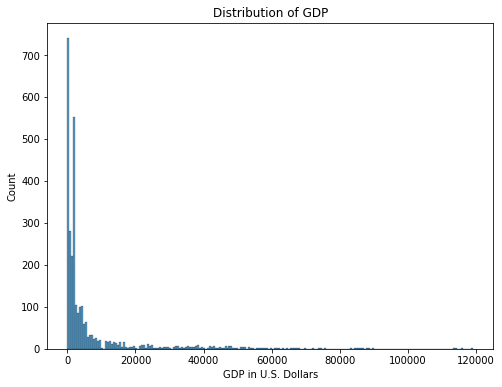

In [28]:
plt.figure(figsize = (8, 6))

sns.histplot(df.gdp, kde = False)
plt.title('Distribution of GDP')
plt.xlabel("GDP in U.S. Dollars")

plt.show()

Here we can see one tall peak on the left-hand side, and a very long right-tail along the x-axis. While we could try to trim down the GDP values, it might be beneficial to try plotting the distribution of `transformed values of gdp` instead. That histogram provides a lot more information below than the data in the original form. We can even limit the plot to just be between `0` and `12` to see the distribution more clearly. 
    
This plot indicates below that `log gdp` values are `bimodal`. This is helpful knowledge if we want to build a model to predict gdp values in the future.

In [29]:
# finding positive gdp values
log_gdp = (df.gdp[df.gdp > 0])

In [30]:
# log transformation of gdp values
log_gdp = np.log(log_gdp)

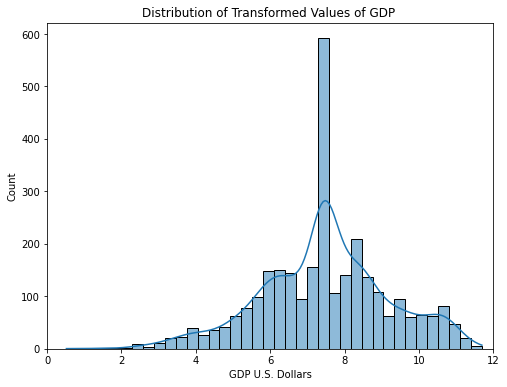

In [31]:
# distribution of the transformed values
plt.figure(figsize = (8, 6))

sns.histplot(log_gdp, kde = True)
plt.title('Distribution of Transformed Values of GDP ')
plt.xlabel('GDP U.S. Dollars')
plt.xlim(0, 12)

plt.show()

Next the distribution of `Life Expectancy` was examined. The distribution of this variable in the data is a bit left skewed where most of the values are on the right-hand side. This is almost the opposite of what was observed in the `GDP` variable above. After checking the distribution of values, the log transformation method will be used to transform values of life expectancy which are greater than 0.

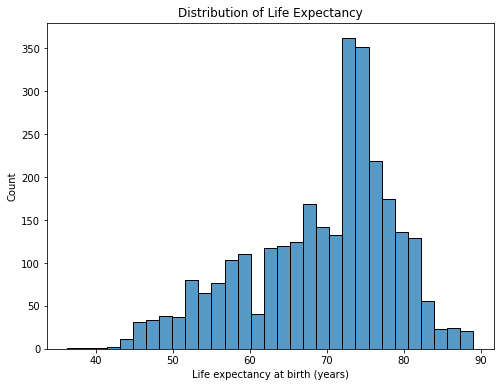

In [32]:
# distribution of the Life Expectancy
plt.figure(figsize = (8, 6))

sns.histplot(df['life expectancy'], kde = False)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life expectancy at birth (years)')

plt.show()

In [33]:
# finding positive values of life expectancy
log_life_exp = (df['life expectancy'][df['life expectancy'] > 0])

In [34]:
# log transformation of values of life expectancy
log_life_exp = np.log(log_life_exp)

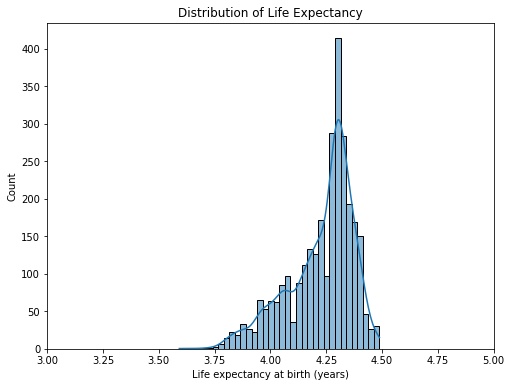

In [35]:
# distribution of the transformed values
plt.figure(figsize = (8, 6))

sns.histplot(log_life_exp, kde = True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life expectancy at birth (years)')
plt.xlim(3, 5)

plt.show()

<b> Visualizing Multivariate Relationships

Exploring multivariate relationships is an important skill that is familiar with univariate (one variable) and bivariate (two variables) analysis. However, datasets often contain more than two features, so it is important to be able to explore and visualize multiple variables at a time. Below multivariate relationships will be used for dataset:

- Scatter plots with visual cues
- Grouped box plots
- Multi-dimensional plots

## Scatter Plots

Next, let’s create a scatter plot using Python’s seaborn library to visualize the relationship between `Years of Education` and `Life Expectancy`:

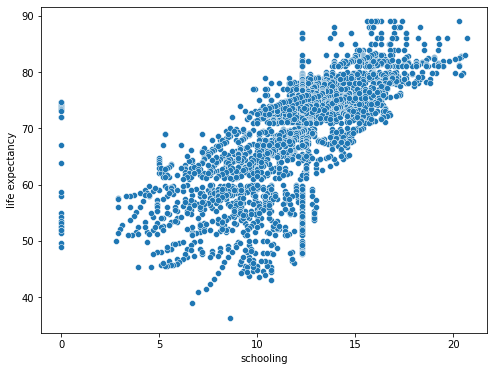

In [36]:
# creating scatter plot
plt.figure(figsize = (8, 6))

sns.scatterplot(x = 'schooling', y = 'life expectancy', data = df)

plt.show()

It is clear from this chart that there is a `positive` relationship between years of schooling and life expectancy.
    
Let’s make this analysis more interesting by adding a third variable to the scatter plot using color as a visual cue. We can do this by passing in a `hue` argument.

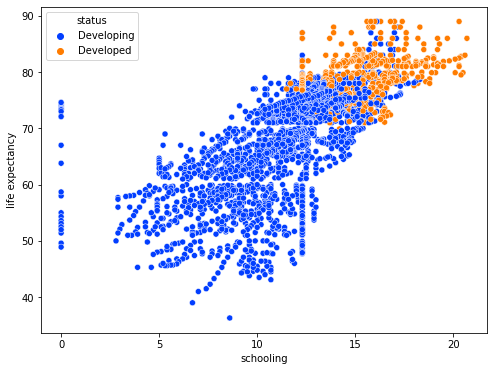

In [37]:
# relationship between schooling, life expectancy and status
plt.figure(figsize = (8, 6))

sns.scatterplot(x = 'schooling', y = 'life expectancy', hue = 'status', 
                palette = 'bright', data = df)

plt.show()

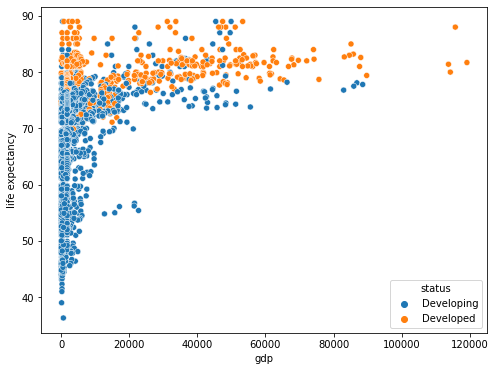

In [38]:
# relationship between gdp and life expectancy
plt.figure(figsize = (8, 6))

sns.scatterplot(x = 'gdp', y = 'life expectancy', hue = 'status', data = df)

plt.show()

These multivariate visualizations provide much more insights than the bivariate visualizations above. For example, we can see that: 

- Life expectancy has a positive relationship between years of education and gdp;
- Individuals in developed countries have more years of schooling than individuals in developing countries;
- The life expectancy in developed countries is greater than the life expectancy in developing countries;

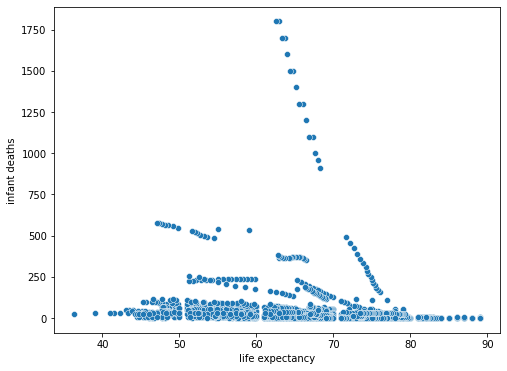

In [39]:
# relationship between infant deaths and life expectancy
plt.figure(figsize = (8, 6))

sns.scatterplot(x = 'life expectancy', y = 'infant deaths', data = df)

plt.show()

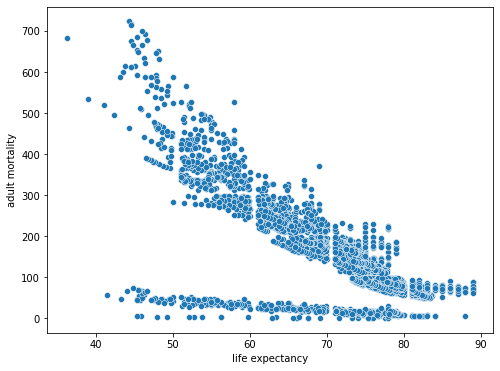

In [40]:
# relationship between adult mortality and life expectancy
plt.figure(figsize = (8, 6))

sns.scatterplot(x = 'life expectancy', y = 'adult mortality', data = df)

plt.show()

- Adult mortality has a negative relationship with life expectancy, in contrary infant deaths almost no  quite relationship;

## Heat Map

Another common data visualization for multivariate analysis is a `heat` `map` of a correlation matrix for all quantitative variables:

In [42]:
# defining the colormap
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

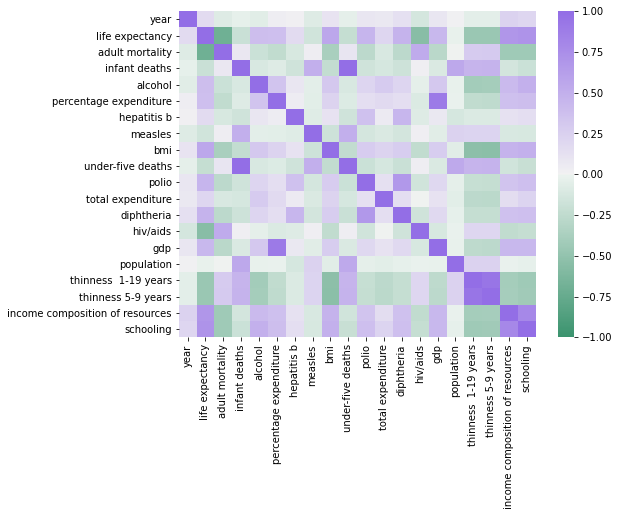

In [43]:
# creating heatmap using the .corr method
plt.figure(figsize=(8,6))

sns.heatmap(df.corr(), vmin = -1, center=0,vmax = 1,
            cmap=colors, robust=True)
plt.show()

## Box Plots

Two good options for investigating the relationship between a quantitative variable and a categorical variable are side-by-side or grouped box plots and overlapping histograms. For example, suppose we want to understand the life expectancy in different countries. We could address this question by plotting side by side box plots of life expectancy by status. This plot indicates that `Life Expectancy` in developed countries tends to be `higher` and has `less` `variation` than life expectancy in developing countries.

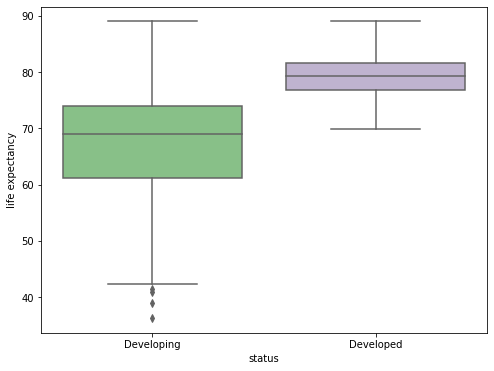

In [44]:
plt.figure(figsize = (8, 6))
sns.boxplot(x='status', y='life expectancy', data=df, palette='Accent')
plt.show()

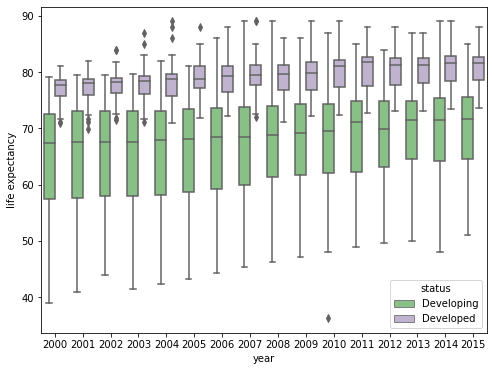

In [45]:
plt.figure(figsize = (8, 6))
sns.boxplot(x='year', y='life expectancy', hue = 'status', data=df, palette='Accent')
plt.show()

On the other hand, `GDP` in different countries also has different variations. The plot below indicates that GDP in developed countries tend to be higher and have more variation than GDP in developing countries.

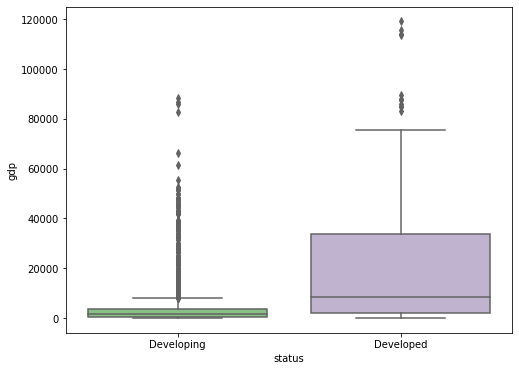

In [46]:
plt.figure(figsize = (8, 6))
sns.boxplot(x='status', y='gdp', data=df, palette='Accent')
plt.show()

## Line Plots

Next the data will explore `GDP` and `Life Expectancy` with `Status` of countries over the `years` through line charts.

Below the countries are separated by colors and one can see that developed countries have substantial changes over years. The developing countries did not see more increases in this magnitude and stayed almost constant.

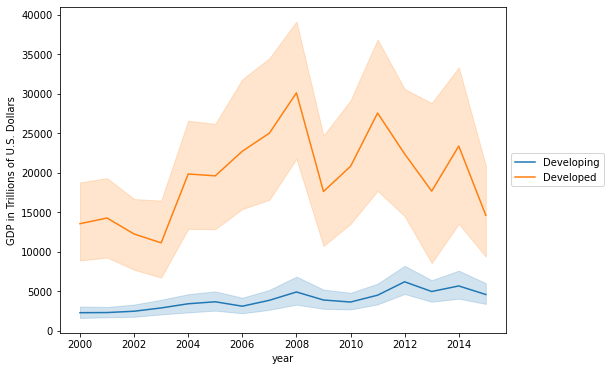

In [47]:
plt.figure(figsize=(8,6))

sns.lineplot(x=df.year, y=df.gdp, hue = df.status)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")

plt.show()

The chart below now shows at life expectancy over the years. The chart shows that both developing and developed countries have been increasing their life expectancy during given years.

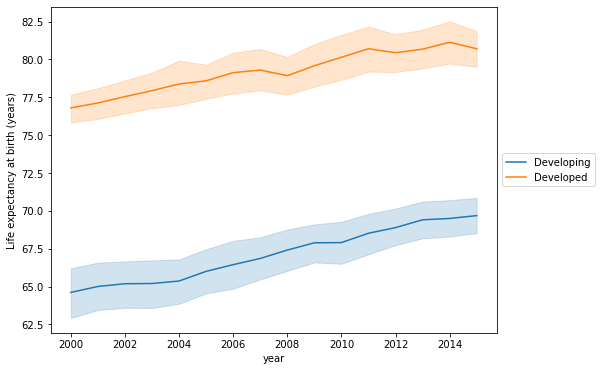

In [48]:
plt.figure(figsize=(8,6))

sns.lineplot(x=df.year, y=df['life expectancy'], hue=df.status)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");

plt.show()

## Bar Plot

For categorical variables, we can use a bar plot (instead of a histogram) to quickly visualize the frequency (or proportion) of values in each category. For example, suppose we want to know how many `Countries` are available in each `Status` during years.

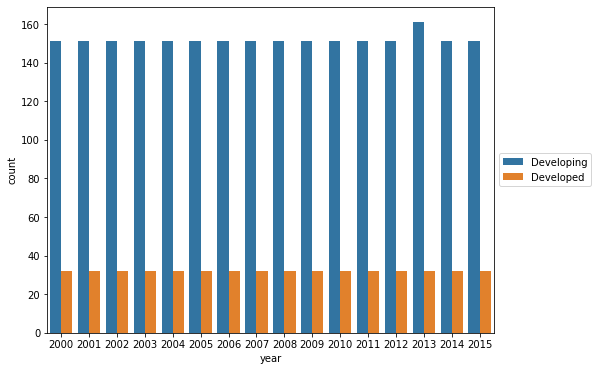

In [49]:
plt.figure(figsize = (8, 6))

sns.countplot(x = 'year', hue = 'status', data = df)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

In conclusion, this project was able to make quite a few data visualizations with the data even though there were only 2938 rows and 22 columns.